# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Get test and train data

In [4]:
# for get_data function
enable_feature_engineering_gender = True
enable_feature_engineering_height_weight = True 
enable_feature_engineering_gluc_chol = True
enable_feature_engineering_alco_smoking = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.9, 0.0, 0.1)

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering_gender, enable_feature_engineering_height_weight, enable_feature_engineering_gluc_chol, enable_feature_engineering_alco_smoking, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 2 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 186 rows -> systolic bp too low.
Dropped 47 rows -> systolic bp too high.
Dropped 40 rows -> diastolic bp too low.
Dropped 948 rows -> diastolic bp too high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


D:\Programms\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


# Model without tuning

## Create and train the model

In [6]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation

## Prediction

In [7]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)
y_proba = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.729036021583783

Precision Score:
0.7390197326543603

Recall Score:
0.6910714285714286

F1-Score:
0.7142417717625347

Cost:
2896



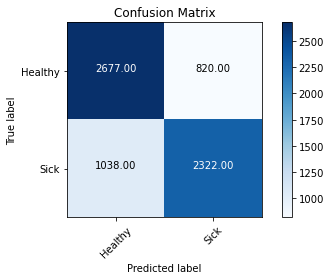

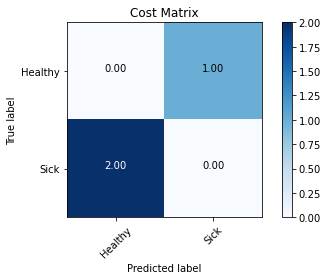

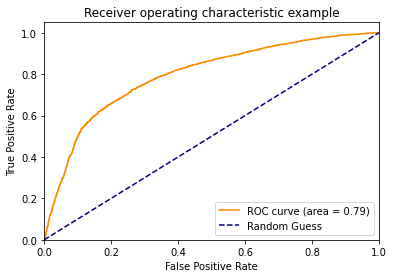


ROC Score:
0.7942521736318204


In [8]:
show_evaluation(y_test, y_pred, y_proba)

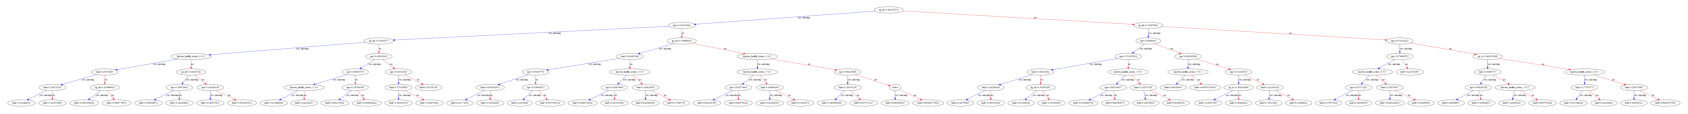

In [9]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

## Most important variables

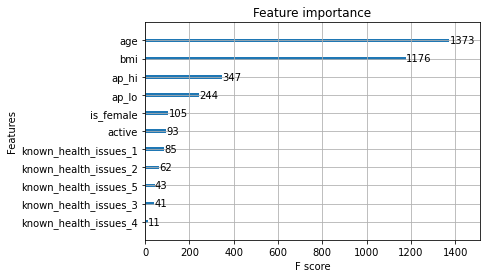

In [10]:
xgb.plot_importance(model)


# Model(s) with tuning

### Tune max_depth and min_child_weight

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test2b = {
 'max_depth':[2,3,4],
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2b.fit(x_train,y_train)
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

### Tune gamma

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

### Recheck model

In [ ]:
model1 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

model1.fit(x_train,y_train)


y_prob1 = model1.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)
y_proba1 = model.predict_proba(x_test)[:,1]

In [ ]:
show_evaluation(y_test, y_pred1, y_proba1)

In [ ]:
xgb.plot_importance(model1)

### Tune subsample and colsample_bytree

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}  
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

### Tune regularization parameters

In [ ]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=70, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.95, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,cv=5)
gsearch6.fit(x_train,y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.95, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

### Recheck model

In [ ]:
model2 = XGBClassifier( 
    learning_rate=0.1, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=6, 
    gamma=0.0, 
    subsample=0.95, 
    colsample_bytree=0.75,
    reg_alpha=0.05,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model2.fit(x_train,y_train)


y_prob2 = model2.predict(x_test.astype('float32'))
y_pred2 = np.round(y_prob2)
y_proba2 = model.predict_proba(x_test)[:,1]

In [ ]:
show_evaluation(y_test, y_pred2, y_proba2)

### Change learning rate

In [ ]:
model3 = XGBClassifier( 
    learning_rate=0.01, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=6, 
    gamma=0.0, 
    subsample=0.95, 
    colsample_bytree=0.75,
    reg_alpha=0.05,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model3.fit(x_train,y_train)


y_prob3 = model3.predict(x_test.astype('float32'))
y_pred3 = np.round(y_prob3)
y_proba3 = model.predict_proba(x_test)[:,1]

In [ ]:
show_evaluation(y_test, y_pred3, y_proba3)